<center><h1>Stock Market Prediction</h1></center>

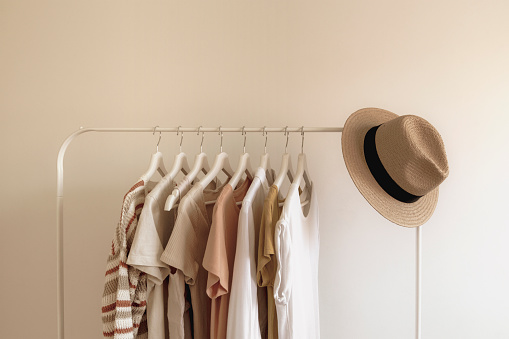

## by Noura El-Mamlouk

# Introduction

For most stock investors, the favourite question is "How long should we hold a stock for?"
I focused on the clothing industries and to make the comparison easier,
15 clothing industries which are :
-AFL (Aflac Inc.)
-CVX (Caleres Inc.)
-GPS (Gap Inc.)
-HBI (Hanesbrands Inc.)
-JWN (Nordstrom Inc.)
-KSS (Kohl's Corp.)
-LB (L Brands Inc.)
-M (Macy's Inc.)
-NKE (Nike Inc.)
-PVH (PVH Corp.)
-ROST (Ross Stores Inc.)
-TPR (Tapestry Inc.)
-TIF (Tiffany & Co.)
-WMT (Walmart Inc.)
-ZTS (Zoetis Inc.)

## prepare the libraries

In [27]:
##Importing libraries##
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# 1.Data Wrangling


In [3]:
df = pd.read_csv('clothing industries.csv')
df.head()

,date,open,high,low,close,volume,Name
0,08/02/2013,50.38,50.50,50.0800,50.35,4175138,AFL
1,11/02/2013,50.36,50.39,50.1100,50.26,3321756,AFL
2,12/02/2013,50.11,50.22,49.4200,49.50,7704847,AFL
3,13/02/2013,49.43,49.54,48.4900,48.65,6063028,AFL
4,14/02/2013,48.43,48.93,48.1724,48.83,4984415,AFL


In [4]:
df.shape

(18884, 7)

In [5]:
num_stocks = df['Name'].nunique()
print(num_stocks)

15


In [6]:
stock_names = df['Name'].unique()
print(stock_names)

['AFL' 'CVX' 'GPS' 'HBI' 'JWN' 'KSS' 'LB' 'M' 'NKE' 'PVH' 'ROST' 'TPR'
 'TIF' 'WMT' 'ZTS']


# 2.Data Cleaning

In [7]:
# drop missing values
df.dropna(inplace=True)

# count the number of missing values
missing_values_count = df.isnull().sum().sum()
print("Number of missing values:", missing_values_count)

Number of missing values: 0


In [8]:
num_duplicates = df.duplicated().sum()
df = df.drop_duplicates()
# Get the number of rows that were removed
num_removed = num_duplicates - df.duplicated().sum()
print(f'{num_removed} duplicate rows removed.')

0 duplicate rows removed.


In [9]:
# Removing Outliers
for column in df.select_dtypes(include=np.number):
    df = df[np.abs(df[column] - df[column].mean()) <= (3 * df[column].std())]

In [10]:
#Convert date to datetime format: If the date column is not in datetime format, convert it to datetime format.
df['date'] = pd.to_datetime(df['date'])
df

,date,open,high,low,close,volume,Name
0,2013-08-02,50.38,50.50,50.0800,50.35,4175138,AFL
1,2013-11-02,50.36,50.39,50.1100,50.26,3321756,AFL
2,2013-12-02,50.11,50.22,49.4200,49.50,7704847,AFL
3,2013-02-13,49.43,49.54,48.4900,48.65,6063028,AFL
4,2013-02-14,48.43,48.93,48.1724,48.83,4984415,AFL
...,...,...,...,...,...,...,...
18879,2018-01-02,76.84,78.27,76.6900,77.82,2982259,ZTS
18880,2018-02-02,77.53,78.12,76.7300,76.78,2595187,ZTS
18881,2018-05-02,76.64,76.92,73.1800,73.83,2962031,ZTS
18882,2018-06-02,72.74,74.56,72.1300,73.27,4924323,ZTS


# 3) EDA (Explaratory Data Analysis)

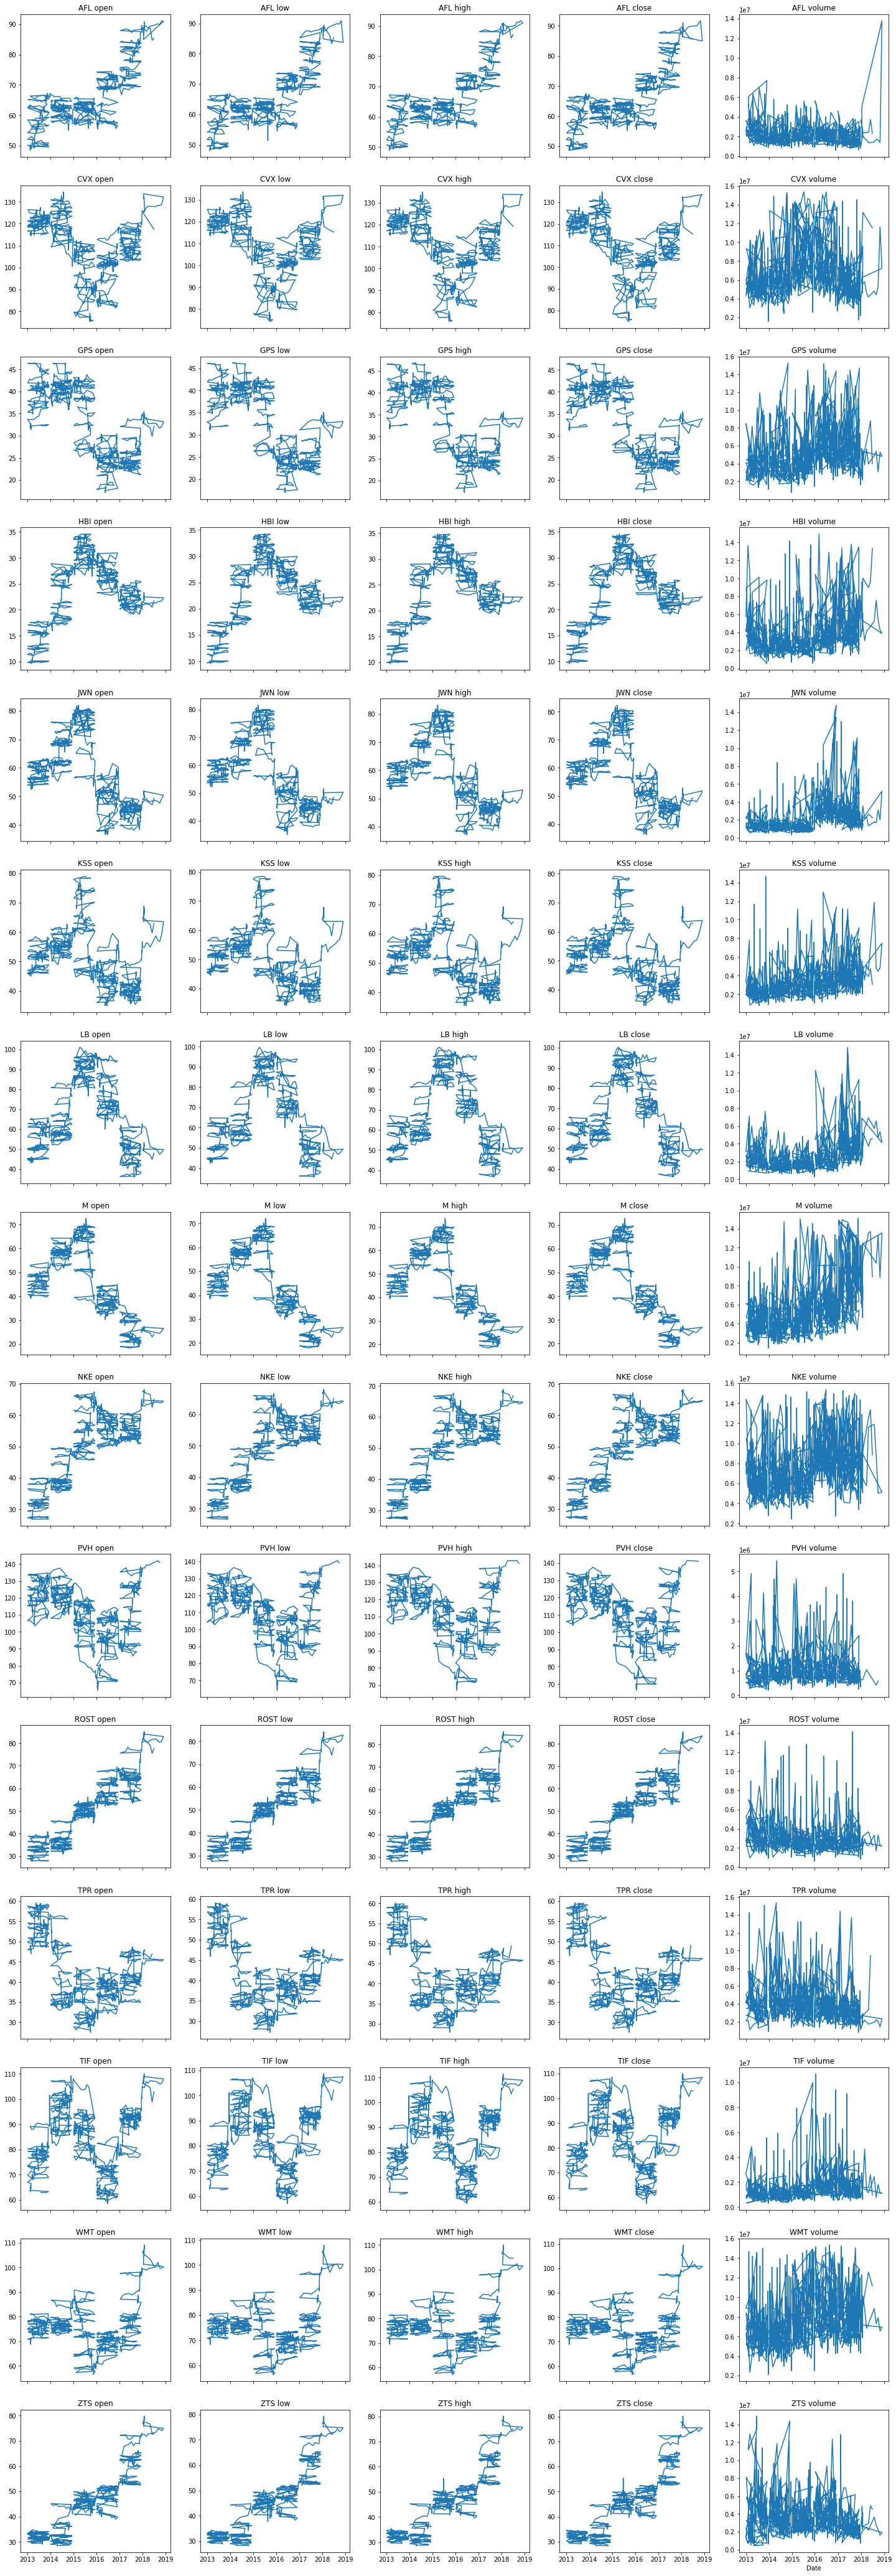

In [11]:
# Create a new figure
fig, axs = plt.subplots(len(stock_names), 5, figsize=(25, len(stock_names)*5), sharex=True)

# Loop through each stock
for i, stock_name in enumerate(stock_names):
    # Filter the data for each stock
    stock_data = df[df['Name'] == stock_name]
    # Plot the open, low, high, and volume prices for the stock
    axs[i, 0].plot(stock_data['date'], stock_data['open'])
    axs[i, 1].plot(stock_data['date'], stock_data['low'])
    axs[i, 2].plot(stock_data['date'], stock_data['high'])
    axs[i, 3].plot(stock_data['date'], stock_data['close'])
    axs[i, 4].plot(stock_data['date'], stock_data['volume'])
    axs[i, 0].set_title(stock_name+' open')
    axs[i, 1].set_title(stock_name+' low')
    axs[i, 2].set_title(stock_name+' high')
    axs[i, 3].set_title(stock_name+' close')
    axs[i, 4].set_title(stock_name+' volume')
plt.xlabel('Date')
plt.show()

## Correlation Matrix

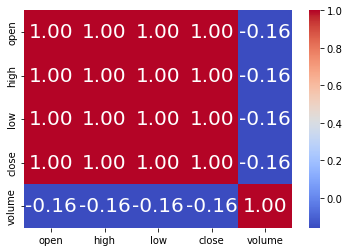

<Figure size 1080x1080 with 0 Axes>

In [12]:
# Create correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':20})
plt.figure(figsize=(15,15))
# Show plot
plt.show()

it's obvious that the variables open, high, low, close are approximatly equal so, i will draw the distribution of only one of them "close" and the others will have the same distribution with ploting the distribution of volume

## Normalization and Distributions

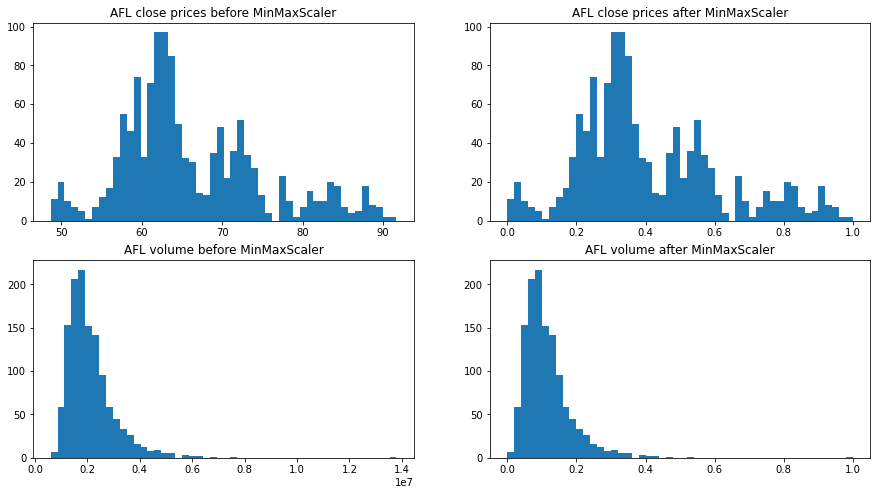

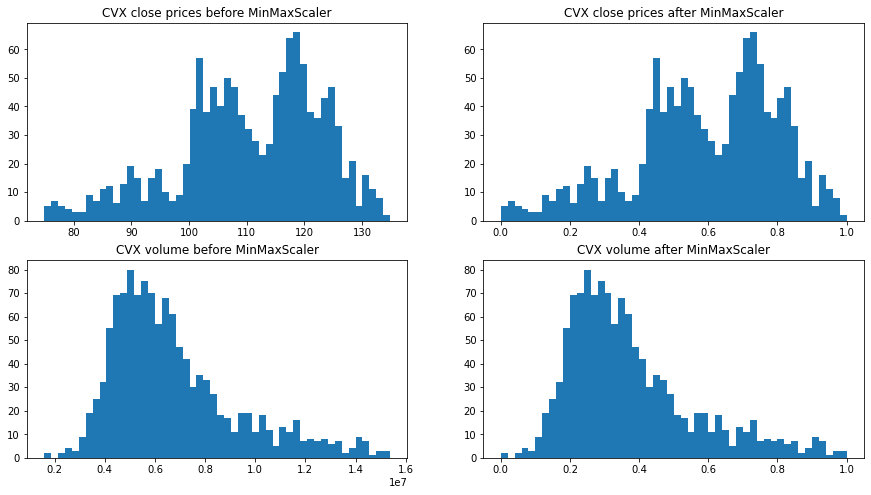

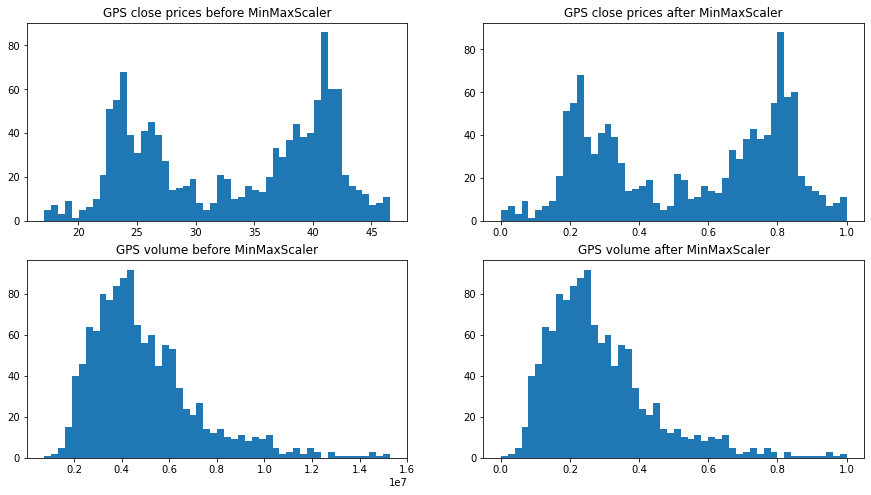

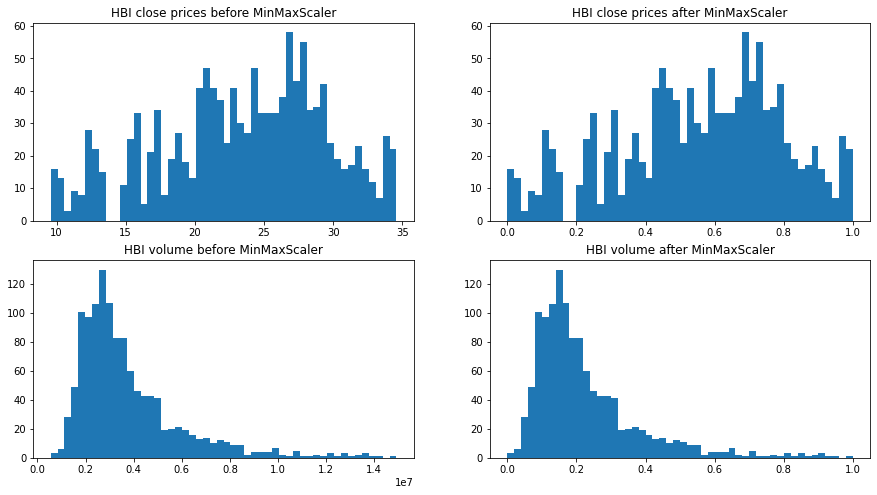

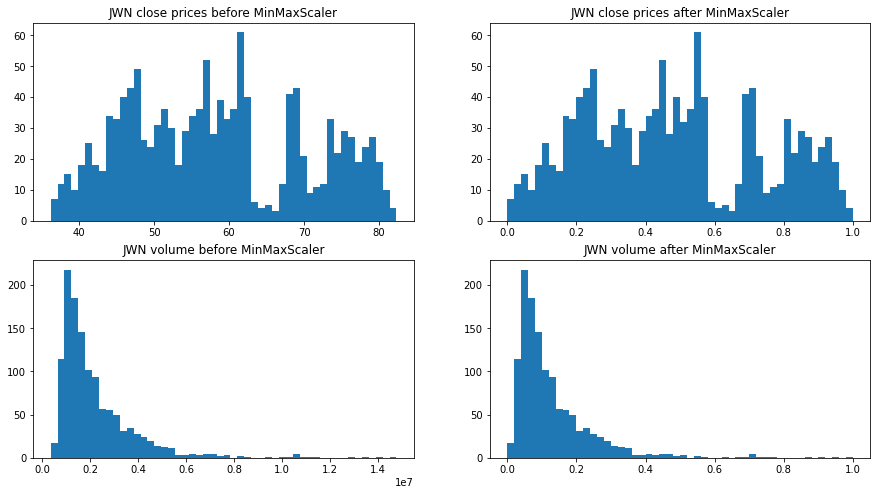

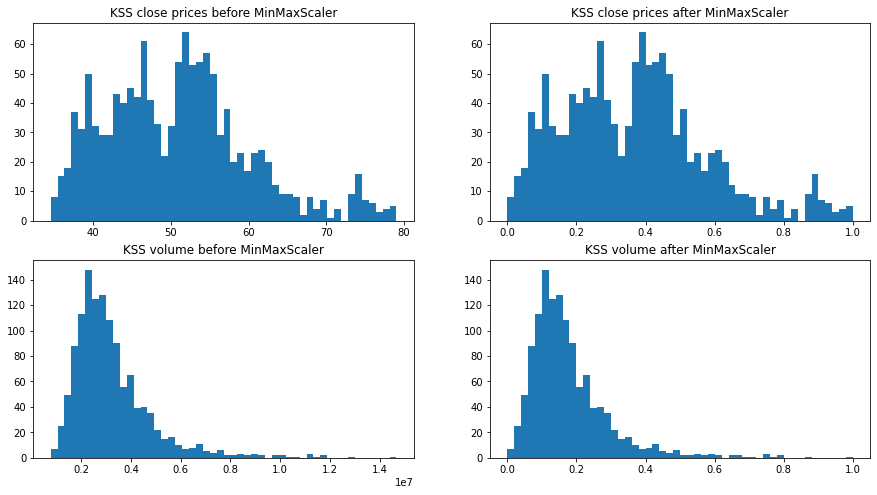

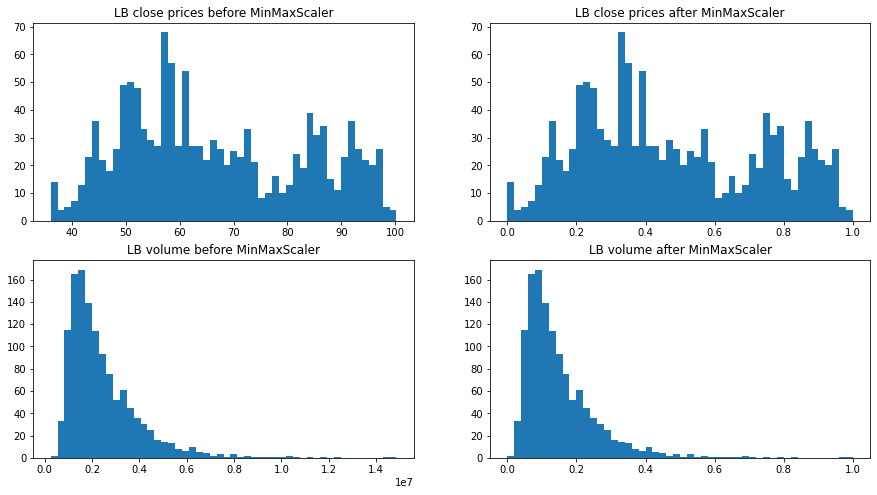

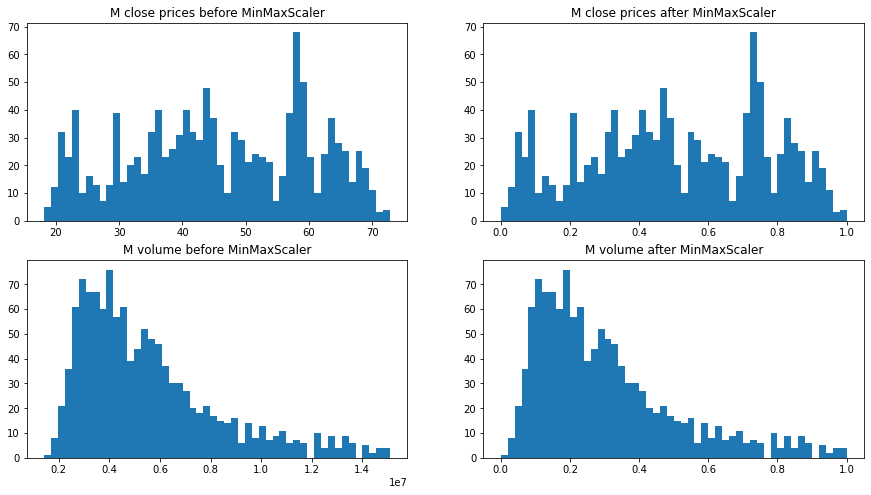

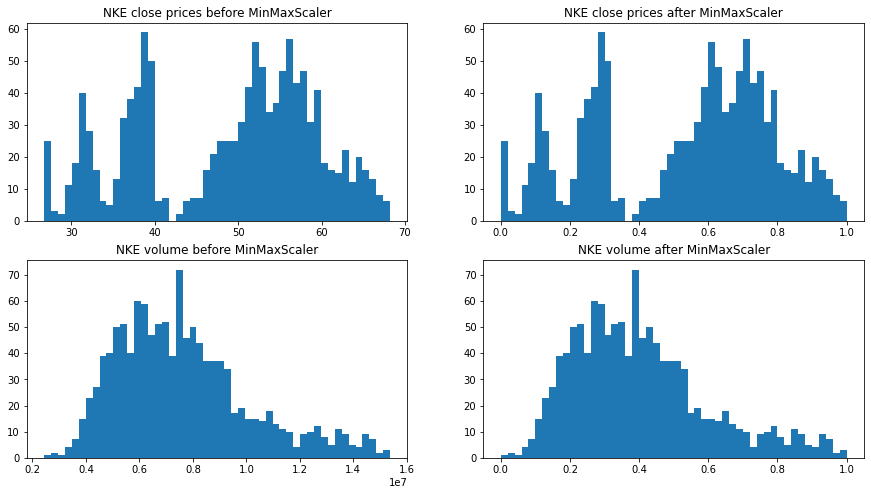

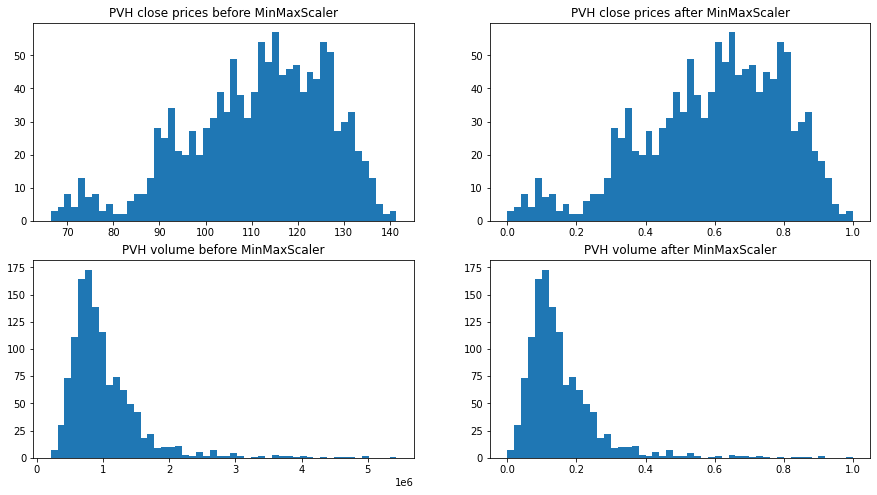

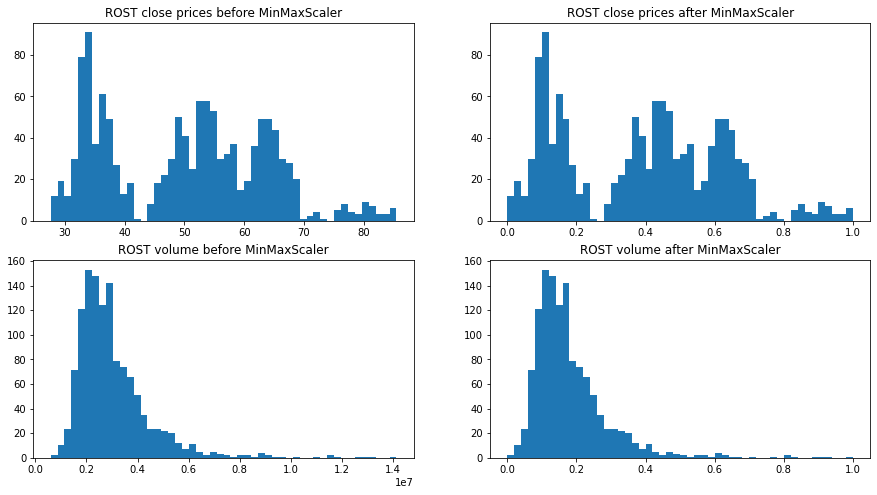

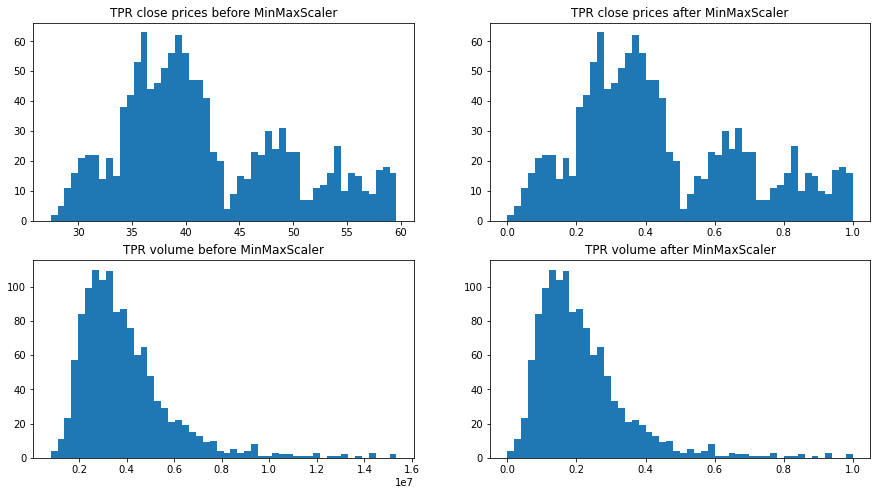

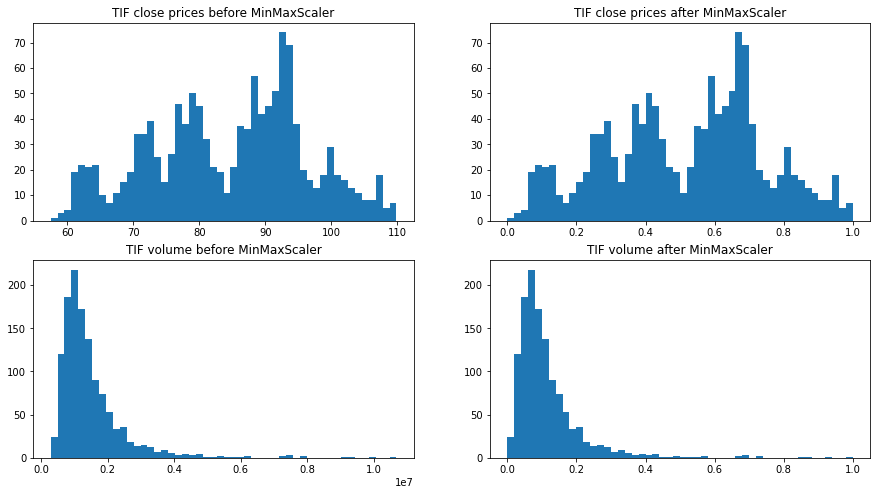

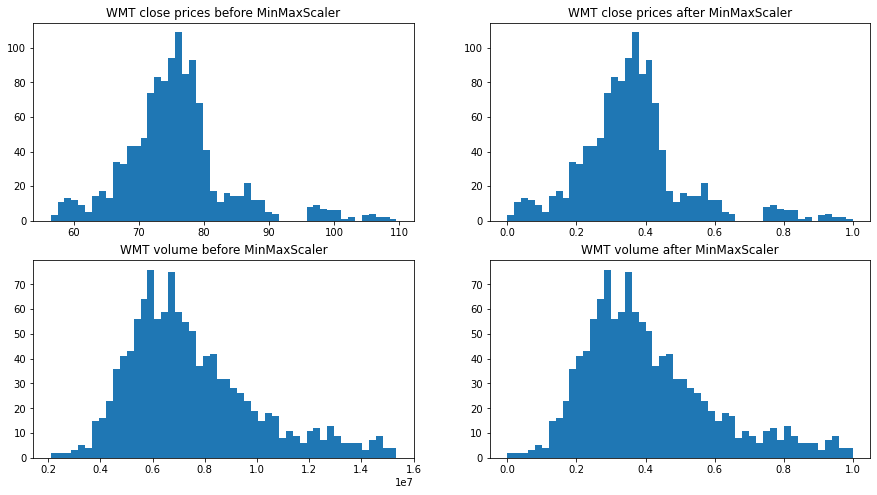

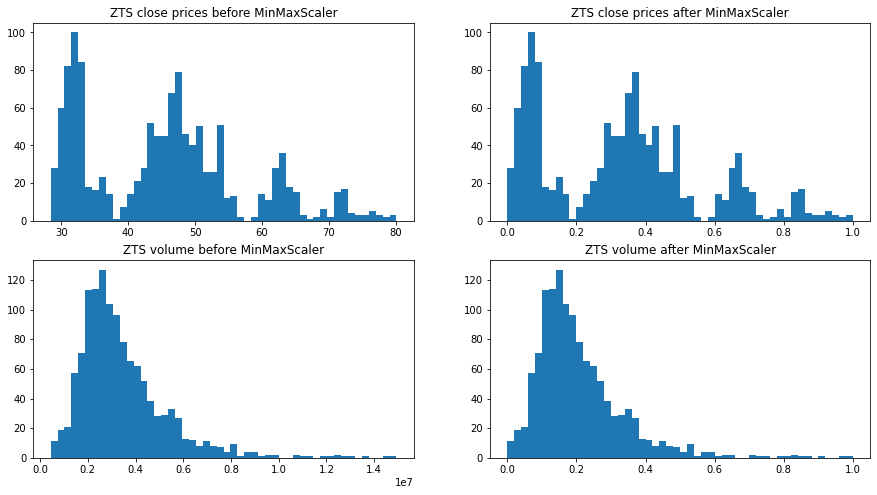

In [13]:
# Loop through each stock
for stock_name in stock_names:
    # Filter the data for each stock
    stock_data = df[df['Name'] == stock_name]
    data_to_normalize = stock_data[['close','volume']]
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data_to_normalize)
    df_normalized = pd.DataFrame(normalized_data,columns=['close','volume'])
    stock_data_normalized = df_normalized.join(stock_data[['Name','date']])
    # Create a new figure for each stock
    fig, axs = plt.subplots(2, 2, figsize=(15, 8))
    # Plot the histograms of the close prices before and after normalization
    axs[0, 0].hist(stock_data['close'], bins=50)
    axs[0, 1].hist(stock_data_normalized['close'], bins=50)
    axs[1, 0].hist(stock_data['volume'], bins=50)
    axs[1, 1].hist(stock_data_normalized['volume'], bins=50)
    axs[0, 0].set_title(stock_name + ' close prices before MinMaxScaler')
    axs[0, 1].set_title(stock_name + ' close prices after MinMaxScaler')
    axs[1, 0].set_title(stock_name + ' volume before MinMaxScaler')
    axs[1, 1].set_title(stock_name + ' volume after MinMaxScaler')
    plt.show()


In [14]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])
df

,date,open,high,low,close,volume,Name
0,2013-08-02,0.307891,0.306409,0.309439,0.309304,0.261422,AFL
1,2013-11-02,0.307740,0.305583,0.309668,0.308621,0.205166,AFL
2,2013-12-02,0.305852,0.304305,0.304401,0.302857,0.494108,AFL
3,2013-02-13,0.300716,0.299196,0.297301,0.296411,0.385876,AFL
4,2013-02-14,0.293162,0.294613,0.294877,0.297776,0.314772,AFL
...,...,...,...,...,...,...,...
18879,2018-01-02,0.507752,0.515065,0.512577,0.517643,0.182785,ZTS
18880,2018-02-02,0.512963,0.513938,0.512882,0.509755,0.157269,ZTS
18881,2018-05-02,0.506241,0.504921,0.485782,0.487382,0.181452,ZTS
18882,2018-06-02,0.476783,0.487189,0.477766,0.483135,0.310810,ZTS


# 4.Splitting the Data and Model training

## creating a new colums called days and next_day_close to predict the stock

In [15]:
    # Load the stock market data into a pandas dataframe
    stock_data = df[df.Name == stock_name]
    df['next_day_close'] = df['close'].shift(-1)
    df['days'] = df['date'].dt.day
    df.dropna(inplace=True)
    df

,date,open,high,low,close,volume,Name,next_day_close,days
0,2013-08-02,0.307891,0.306409,0.309439,0.309304,0.261422,AFL,0.308621,2
1,2013-11-02,0.307740,0.305583,0.309668,0.308621,0.205166,AFL,0.302857,2
2,2013-12-02,0.305852,0.304305,0.304401,0.302857,0.494108,AFL,0.296411,2
3,2013-02-13,0.300716,0.299196,0.297301,0.296411,0.385876,AFL,0.297776,13
4,2013-02-14,0.293162,0.294613,0.294877,0.297776,0.314772,AFL,0.301644,14
...,...,...,...,...,...,...,...,...,...
18878,2018-01-31,0.520215,0.518822,0.511432,0.509376,0.258866,ZTS,0.517643,31
18879,2018-01-02,0.507752,0.515065,0.512577,0.517643,0.182785,ZTS,0.509755,2
18880,2018-02-02,0.512963,0.513938,0.512882,0.509755,0.157269,ZTS,0.487382,2
18881,2018-05-02,0.506241,0.504921,0.485782,0.487382,0.181452,ZTS,0.483135,2


In [28]:
def predict_price(days, stock_name):

    # Create a new column with the shifted closing price
    X = df[['open', 'high', 'low', 'close', 'volume', 'days']]
    y = df['next_day_close']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    compare_models(X_train, X_test, y_train, y_test, stock_name)

def compare_models(X_train, X_test, y_train, y_test, stock_name):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'XGBoost': XGBRegressor()
    }
    # Create a dictionary to store the models' performance
    performance = {}
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(X_train, y_train)
        # Make predictions on the testing data
        y_pred = model.predict(X_test)
        print(f'Predicted stock price for {stock_name} is: {y_pred}')
        # Evaluate the model's performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        performance[name] = {'mse': mse, 'r2': r2}
        print(f'Stock: {stock_name}')
        print(f'Model: {name}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared value: {r2}')
        print()
        plt.scatter(y_test, y_pred)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.title(f'{name} predictions for {stock_name}')
        plt.show()
    # Plot the results
    fig, ax = plt.subplots()
    ax.bar(performance.keys(), [p['mse'] for p in performance.values()])
    ax.set_ylabel('Mean Squared Error')
    ax.set_title(f'MSE of different models for {stock_name}')
    plt.show()


Predicted stock price for AFL is: [0.20827302 0.60279948 0.26519409 ... 0.31062428 0.59292866 0.44794737]
Stock: AFL
Model: Linear Regression
Mean Squared Error: 0.00018120130130740074
R-squared value: 0.9957501821037411



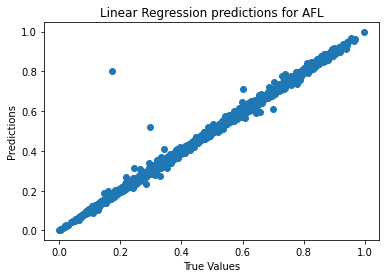

Predicted stock price for AFL is: [0.2135151  0.60508902 0.25037447 ... 0.29876187 0.58711439 0.44597182]
Stock: AFL
Model: Decision Tree
Mean Squared Error: 0.00044421120998530396
R-squared value: 0.9895816600858083



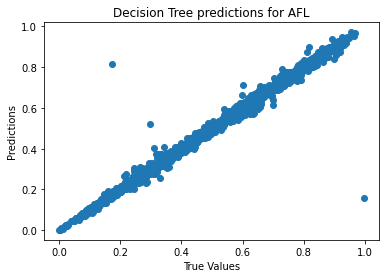

Predicted stock price for AFL is: [0.21056375 0.60091794 0.26854864 ... 0.30864525 0.59846073 0.44694605]
Stock: AFL
Model: XGBoost
Mean Squared Error: 0.0003752578965566334
R-squared value: 0.9911988616362452



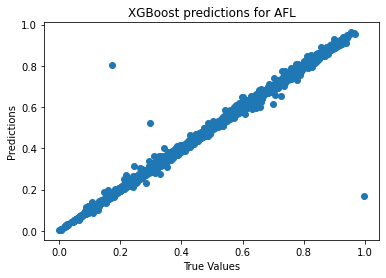

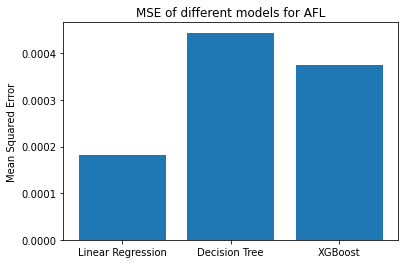

In [29]:
predict_price(5, 'AFL')

Predicted stock price for NKE is: [0.17519372 0.08631648 0.30639466 ... 0.59323822 0.29172347 0.21731888]
Stock: NKE
Model: Linear Regression
Mean Squared Error: 9.215730556722793e-05
R-squared value: 0.9978394951956727



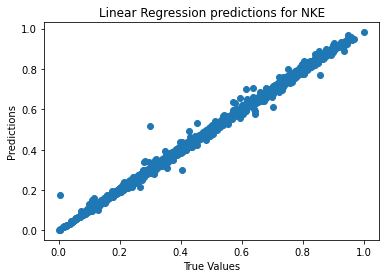

Predicted stock price for NKE is: [0.16311788 0.08738932 0.30774919 ... 0.5830189  0.29004001 0.21677632]
Stock: NKE
Model: Decision Tree
Mean Squared Error: 0.0003668298693939563
R-squared value: 0.9914001642049068



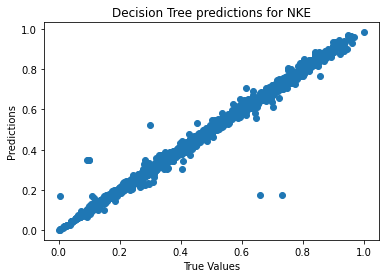

Predicted stock price for NKE is: [0.17360198 0.08483329 0.30502132 ... 0.59443814 0.29046014 0.21671003]
Stock: NKE
Model: XGBoost
Mean Squared Error: 0.00014960473069769412
R-squared value: 0.9964927171271661



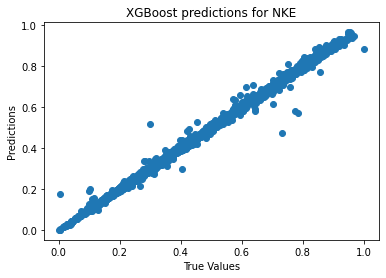

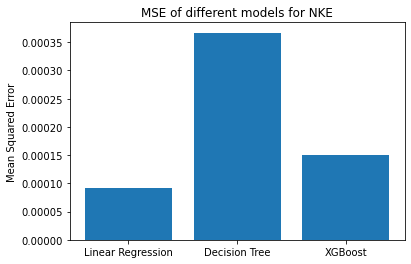

In [30]:
predict_price(20, 'NKE')

# Conclusion


The output shows the predicted stock prices for AFL and NKE using three different models: Linear Regression, Decision Tree, and XGBoost. The Mean Squared Error (MSE) and R-squared values are also provided for each model. The MSE value measures the average of the squares of the errors, and a lower MSE value indicates a better fit of the model to the data. The R-squared value measures the proportion of the variance in the dependent variable that is predictable from the independent variable, and a higher R-squared value indicates a better fit of the model to the data. Overall, 
#### it appears that the XGBoost model has the best performance for both AFL and NKE, as it has the lowest MSE and highest R-squared values compared to the other models.